##    Project name :  Fuel_Consumption_2024(2000-2022)


## Analaysing

 #### I will be predicting the emission level of CO2 emissions in a fuel consumption dataset from Kaggle. The dataset contains various features such as fuel consumption, transmission type, and engine size. My aim is to use five regression techniques and plot scatterplots of each column against emission. First, I will import the necessary libraries such as pandas, numpy, matplotlib, and sklearn. I will load the dataset using pandas. After that, I will clean and preprocess the data by removing missing values, dropping irrelevant columns,dropping duplicates,feature selection etc...


### Model
##### 4WD/4X4 = Four-wheel drive
##### AWD = All-wheel drive
##### CNG = Compressed natural gas
##### FFV = Flexible-fuel vehicle
##### NGV = Natural gas vehicle
##### '#' = High output engine that provides more power than the standard engine of the same size

### Transmission
##### A = Automatic
##### AM = Automated manual
##### AS = Automatic with select shift
##### AV = Continuously variable
##### M = Manual
##### 3 - 10 = Number of gears
##### Fuel Type
##### X = Regular gasoline
##### Z = Premium gasoline
##### D = Diesel
##### E = Ethanol (E85)
##### N = Natural Gas

### Fuel Consumption
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.

### five regression techniques going to use
#### 1.linear regression
#### 2.decision tree regression
#### 3.random forest regression
#### 4. SVM
#### 5.gradientBoosting

In [ ]:
# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import skew,kurtosis
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error,mean_squared_error, mean_absolute_error, r2_score

In [2]:
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {"grid.linestyle": "-"})
custom_palette = ["#99e6b3", "#7fffd4", "#66cdaa", "#00ffff", "#29ab87"]
palette1 = ["#000000", "#696969", "#E6E6FA", "#008080", "#FF7F50"]
palette2 = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"]

#### Load Dataset

In [3]:
df=pd.read_csv("Fuel_Consumption_2000-2022.csv")
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [4]:
df.shape

(22556, 13)

### Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [6]:
df.dtypes

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

In [7]:
df.isnull().sum()# No null values

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [8]:
df.duplicated().sum() # 1 duplicate value

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape #After droping duplicate value

(22555, 13)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,22555.0,2011.554955,6.297939,2000.0,2006.0,2012.0,2017.0,2022.0
ENGINE SIZE,22555.0,3.356617,1.335448,0.8,2.3,3.0,4.2,8.4
CYLINDERS,22555.0,5.854046,1.819582,2.0,4.0,6.0,8.0,16.0
FUEL CONSUMPTION,22555.0,12.763294,3.500922,3.5,10.4,12.3,14.7,30.6
HWY (L/100 km),22555.0,8.918958,2.274675,3.2,7.3,8.4,10.2,20.9
COMB (L/100 km),22555.0,11.034148,2.910839,3.6,9.1,10.6,12.7,26.1
COMB (mpg),22555.0,27.374950,7.376881,11.0,22.0,27.0,31.0,78.0
EMISSIONS,22555.0,250.063844,59.352558,83.0,209.0,243.0,288.0,608.0


In [12]:
df.describe(include='object').T

,count,unique,top,freq
MAKE,22555,87,CHEVROLET,1725
MODEL,22555,4242,JETTA,89
VEHICLE CLASS,22555,32,SUV,2639
TRANSMISSION,22555,30,A4,3518
FUEL,22555,5,X,11822


## EDA (Exploratory Data Analysis)

In [13]:
for i in df.columns:
    print('-'*20)
    print(i,'-',len(df[i].unique())) #sum of unique values of each features

--------------------
YEAR - 23
--------------------
MAKE - 87
--------------------
MODEL - 4242
--------------------
VEHICLE CLASS - 32
--------------------
ENGINE SIZE - 63
--------------------
CYLINDERS - 9
--------------------
TRANSMISSION - 30
--------------------
FUEL - 5
--------------------
FUEL CONSUMPTION - 228
--------------------
HWY (L/100 km) - 152
--------------------
COMB (L/100 km) - 192
--------------------
COMB (mpg) - 59
--------------------
EMISSIONS - 358


In [14]:
for col in df.select_dtypes(include=['object']).columns:
    print(f" unique values in {col}")
    print(df[col].unique())
    print(f"no of unique values - {len(df[col].unique())}")
    print('=====================') # reading everying unique values from each object features

 unique values in MAKE
['ACURA' 'AUDI' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DAEWOO'
 'DODGE' 'FERRARI' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'ISUZU'
 'JAGUAR' 'JEEP' 'KIA' 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MAZDA'
 'MERCEDES-BENZ' 'NISSAN' 'OLDSMOBILE' 'PLYMOUTH' 'PONTIAC' 'PORSCHE'
 'SAAB' 'SATURN' 'SUBARU' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'BENTLEY'
 'ROLLS-ROYCE' 'MASERATI' 'MINI' 'MITSUBISHI' 'SMART' 'HUMMER'
 'ASTON MARTIN' 'LAMBORGHINI' 'BUGATTI' 'SCION' 'FIAT' 'RAM' 'SRT'
 'ALFA ROMEO' 'GENESIS' 'Acura' 'Alfa Romeo' 'Aston Martin' 'Audi'
 'Bentley' 'Bugatti' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'Genesis' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia'
 'Lamborghini' 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda'
 'Mercedes-Benz' 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce'
 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']
no of unique values - 87
 unique values in MODEL
['1.6EL' '3.2TL' '3.5RL' ... 'V90 CC B6 AWD' 'XC60 B5 AWD' 'XC60 B6

Text(0.5, 1.0, 'Top Ten Car Company Contribution in the market')

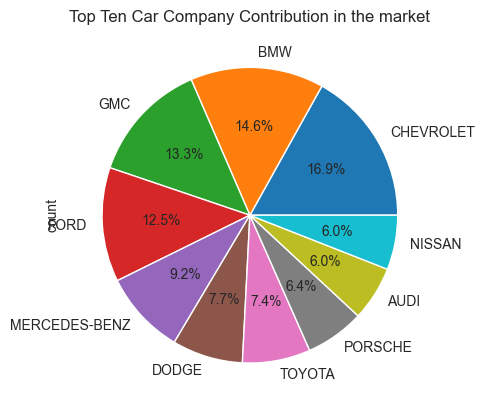

In [15]:
df['MAKE'].value_counts().head(10).plot(kind='pie',autopct="%0.1f%%").set_title('Top Ten Car Company Contribution in the market')
#Top Ten Car Company Contribution in the market

Text(0.5, 1.0, 'Top Ten Car Model')

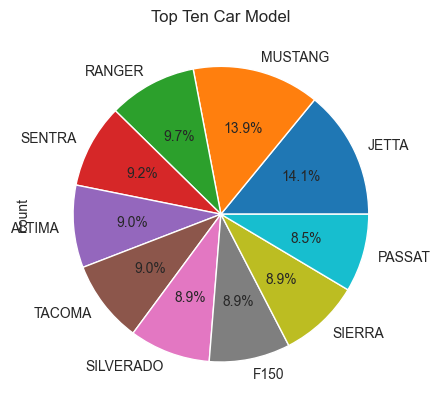

In [16]:
df['MODEL'].value_counts().head(10).plot(kind='pie',autopct="%0.1f%%").set_title('Top Ten Car Model')
#Top Ten Car Model

Text(0.5, 1.0, 'Top 10 Most used Vechicle Class')

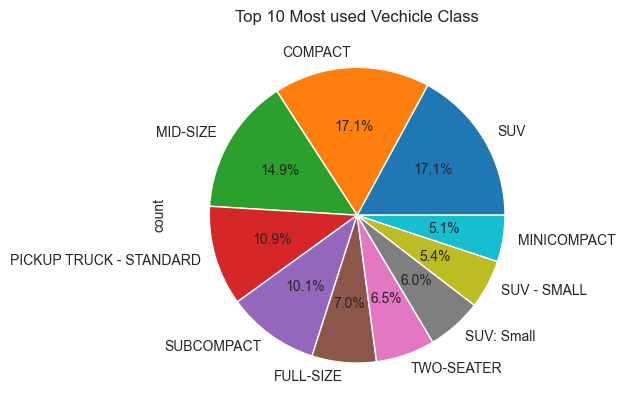

In [17]:
df['VEHICLE CLASS'].value_counts().head(10).plot(kind="pie",autopct="%0.1f%%").set_title("Top 10 Most used Vechicle Class")

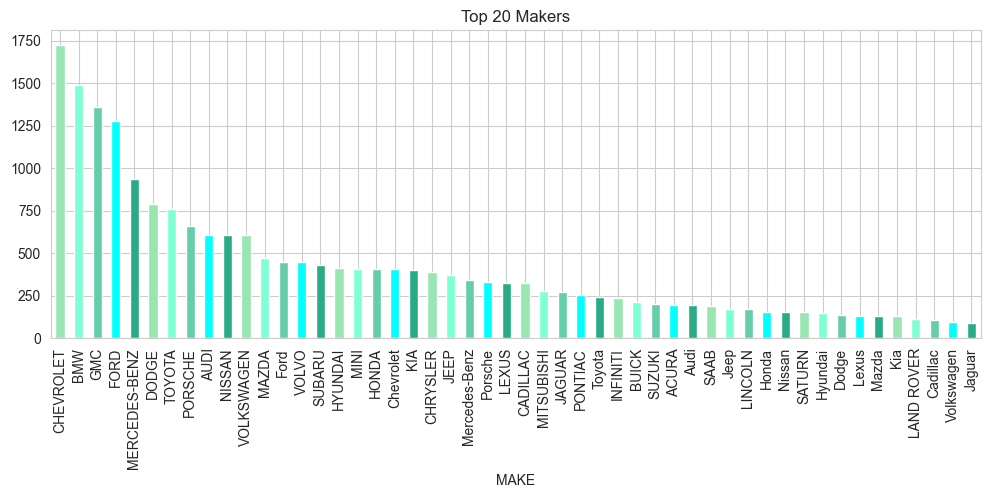

In [18]:
plt.figure(figsize=(12,4))
plt.title('Top 20 Makers')
df['MAKE'].value_counts()[:50].plot(kind='bar',color=custom_palette)
plt.show()

In [19]:
makegrp2=pd.DataFrame(df.groupby(['MAKE','VEHICLE CLASS']).count().reset_index())
makegrp2

,MAKE,VEHICLE CLASS,YEAR,MODEL,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,ACURA,COMPACT,78,78,78,78,78,78,78,78,78,78,78
1,ACURA,MID-SIZE,52,52,52,52,52,52,52,52,52,52,52
2,ACURA,SUBCOMPACT,25,25,25,25,25,25,25,25,25,25,25
3,ACURA,SUV,20,20,20,20,20,20,20,20,20,20,20
4,ACURA,SUV - SMALL,14,14,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,Volvo,Mid-size,7,7,7,7,7,7,7,7,7,7,7
551,Volvo,SUV: Small,18,18,18,18,18,18,18,18,18,18,18
552,Volvo,SUV: Standard,10,10,10,10,10,10,10,10,10,10,10
553,Volvo,Station wagon: Mid-size,6,6,6,6,6,6,6,6,6,6,6


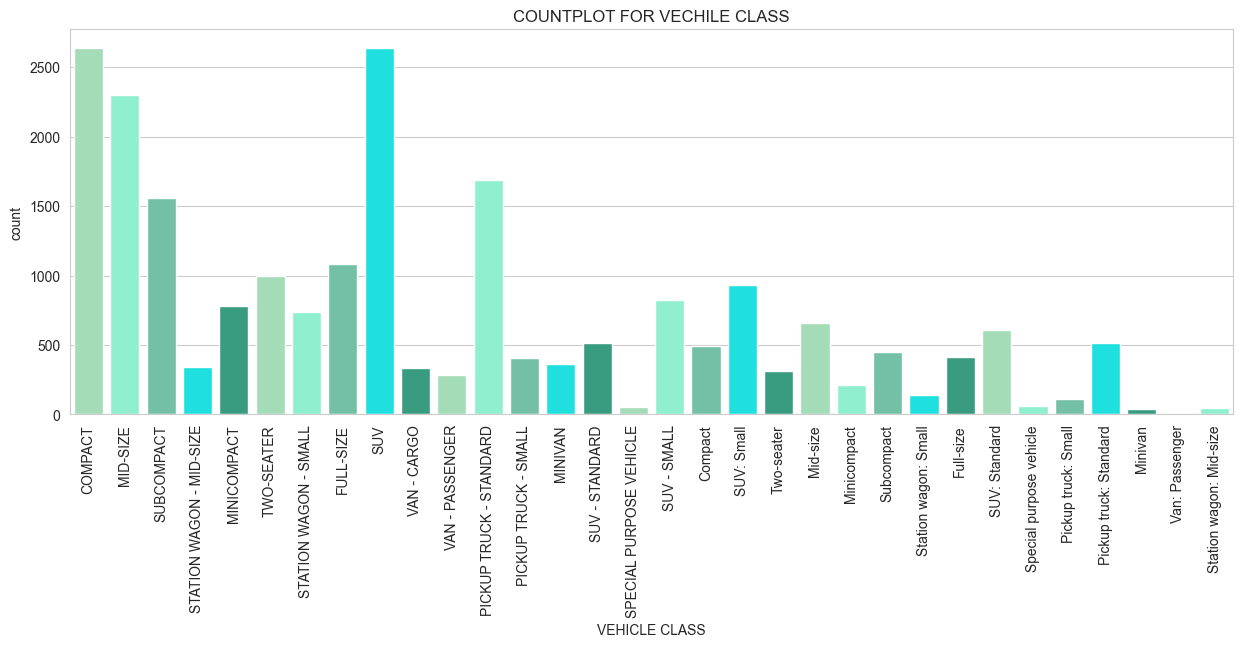

In [20]:
plt.figure(figsize=(15,5))
plt.title('COUNTPLOT FOR VECHILE CLASS')
sns.countplot(x='VEHICLE CLASS',data=df,palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90)
plt.show()

<Axes: xlabel='FUEL CONSUMPTION', ylabel='EMISSIONS'>

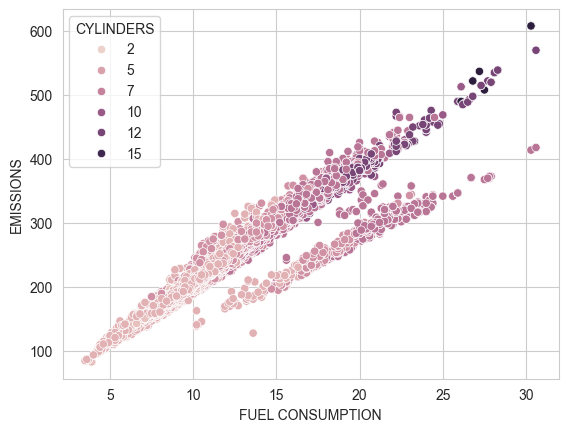

In [21]:
sns.scatterplot(data=df,x='FUEL CONSUMPTION',y='EMISSIONS',hue='CYLINDERS')
# there is a positive correlation between emission and fuel consumption

<Axes: xlabel='ENGINE SIZE', ylabel='FUEL CONSUMPTION'>

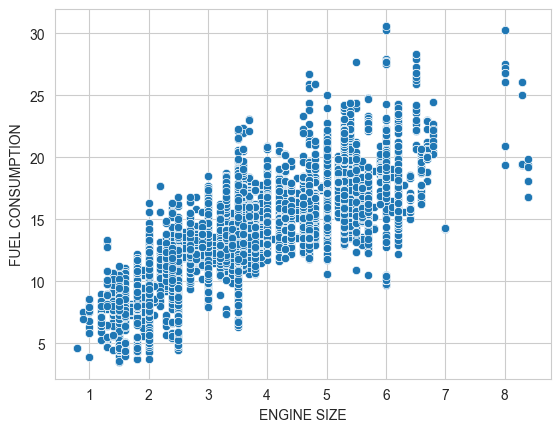

In [22]:
sns.scatterplot(data=df,x='ENGINE SIZE',y='FUEL CONSUMPTION')
#as engine size increases fuel consumption also increases

<Axes: xlabel='ENGINE SIZE', ylabel='FUEL CONSUMPTION'>

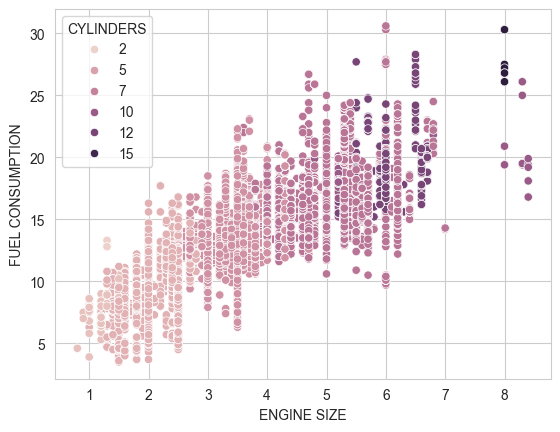

In [23]:
sns.scatterplot(data=df,x='ENGINE SIZE',y='FUEL CONSUMPTION',hue='CYLINDERS')
# there is a positive correlation between engine size,cylinder,and fuel consumption

<Axes: title={'center': 'Make,vehicle class-count'}, xlabel='MAKE', ylabel='VEHICLE CLASS'>

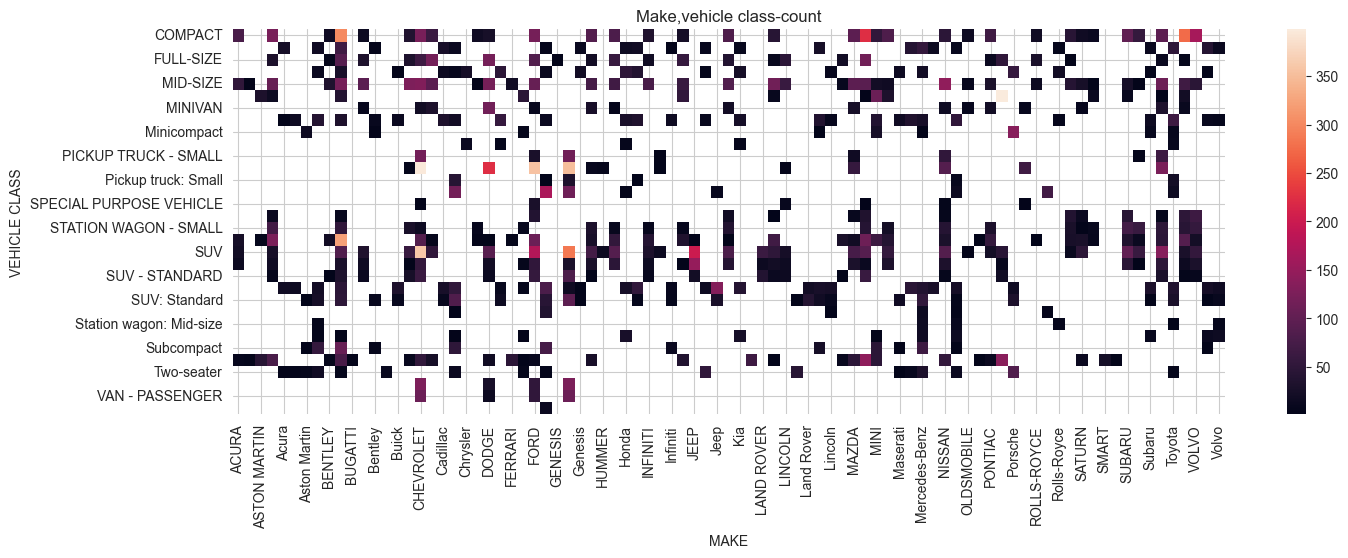

In [109]:
plt.figure(figsize=(16,5))
plt.title('Make,vehicle class-count')
sns.heatmap(makegrp2.pivot_table(columns='MAKE',index='VEHICLE CLASS',values="MODEL"))

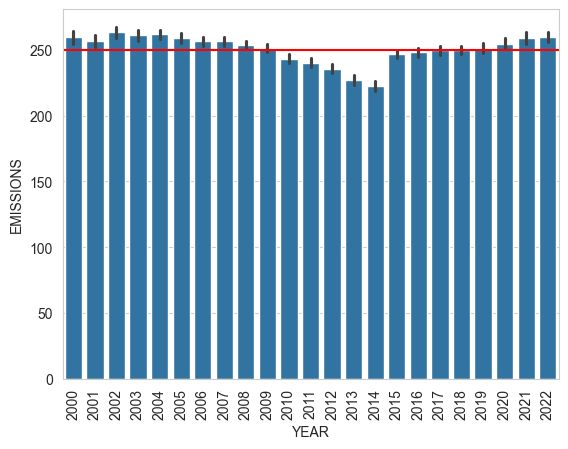

In [24]:
graph=sns.barplot(data=df,x='YEAR',y='EMISSIONS')
plt.xticks(rotation='vertical')
# 2022 co2 emssion is more than 250
# from 2000 to 2022 emssion rate has always been greater than 200
graph.axhline(y=df['EMISSIONS'].mean(),color='red')
# mean emission for all the years from 2000 o 2022 is upto 250
# from 2002 to 2014 there has been a deceares in the emission 
# from 2015 it suddently increased above 250 again

([0, 1, 2, 3],
 [Text(0, 0, 'Z'), Text(1, 0, 'X'), Text(2, 0, 'D'), Text(3, 0, 'E')])

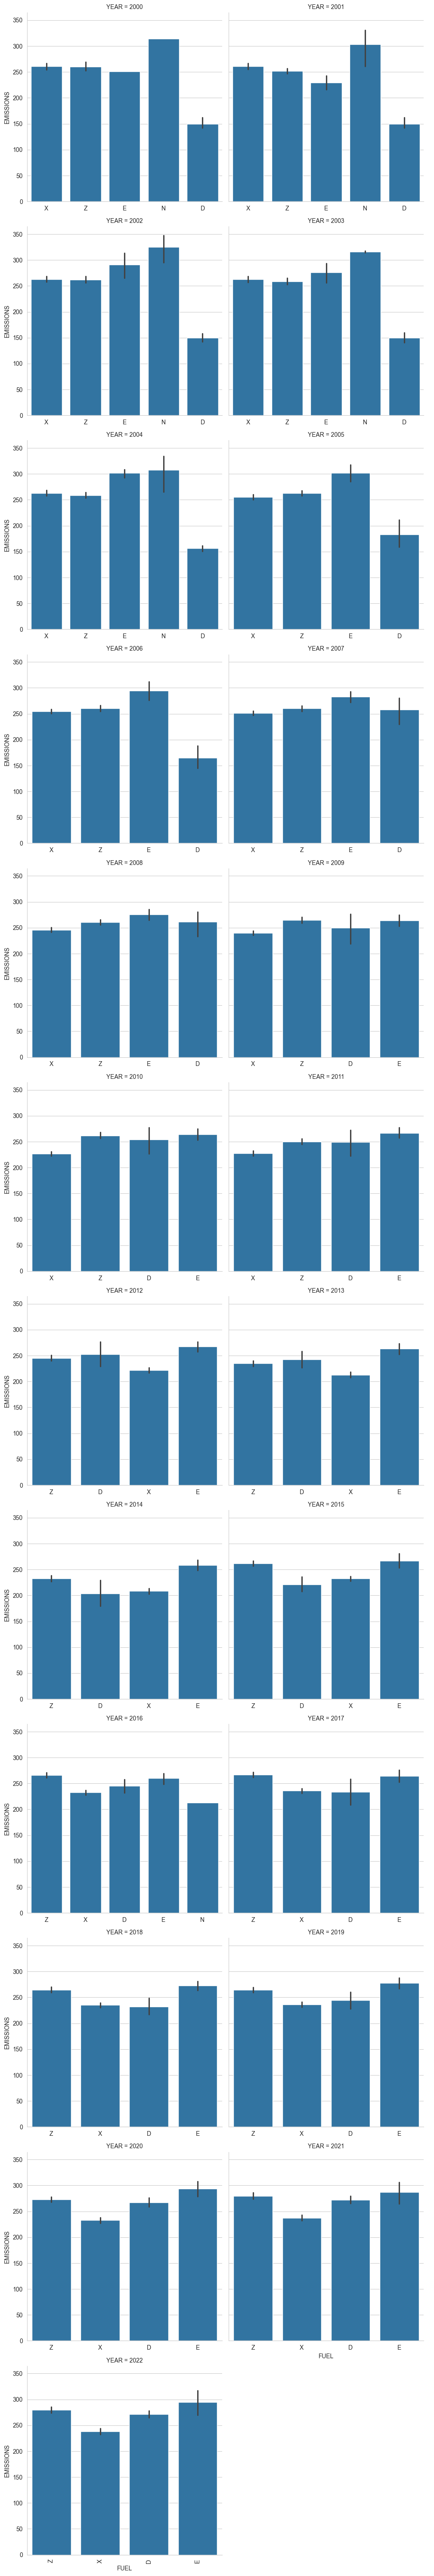

In [25]:
sns.catplot(data=df,x='FUEL',y='EMISSIONS',kind='bar',col='YEAR',col_wrap=2,sharex=False)
plt.xticks(rotation='vertical')

## Feature Selection

In [26]:
df.select_dtypes(include=['int64','float64']).corr()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
YEAR,1.000000,-0.077749,-0.072518,-0.098528,-0.007337,-0.067906,0.079895,-0.047733
ENGINE SIZE,-0.077749,1.000000,0.913385,0.821615,0.749409,0.807329,-0.755006,0.821308
CYLINDERS,-0.072518,0.913385,1.000000,0.794928,0.698321,0.771571,-0.714196,0.802164
FUEL CONSUMPTION,-0.098528,0.821615,0.794928,1.000000,0.942347,0.992959,-0.921355,0.919094
HWY (L/100 km),-0.007337,0.749409,0.698321,0.942347,1.000000,0.975012,-0.884736,0.894767
COMB (L/100 km),-0.067906,0.807329,0.771571,0.992959,0.975012,1.000000,-0.920909,0.922975
COMB (mpg),0.079895,-0.755006,-0.714196,-0.921355,-0.884736,-0.920909,1.000000,-0.901839
EMISSIONS,-0.047733,0.821308,0.802164,0.919094,0.894767,0.922975,-0.901839,1.000000


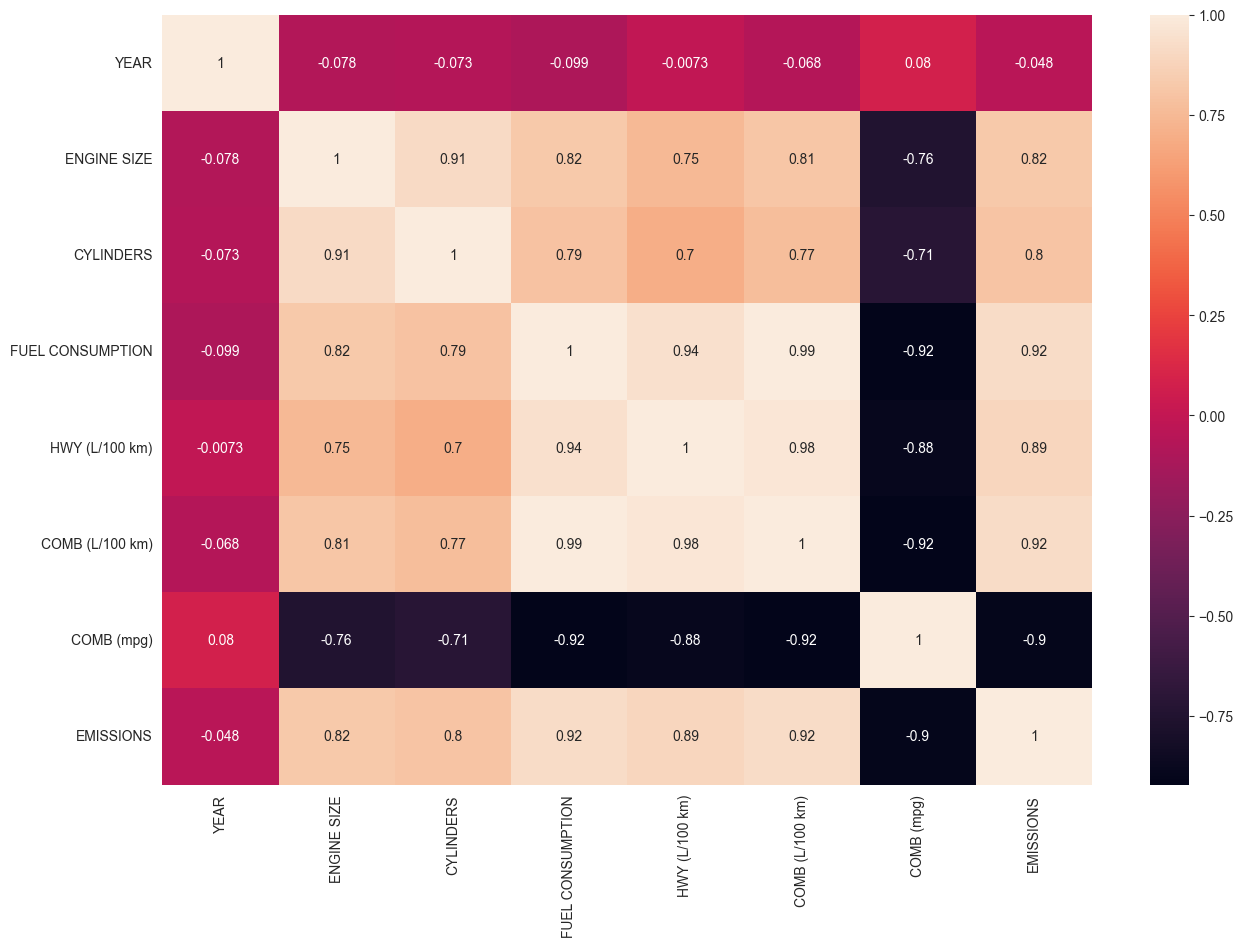

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),annot=True)
plt.show()

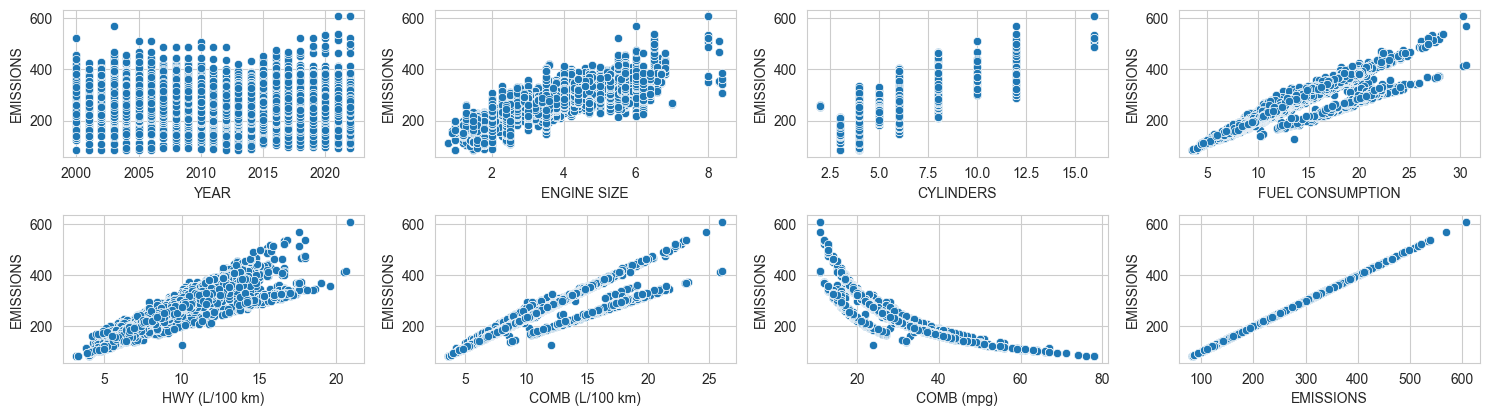

In [28]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['int64','float64']).columns):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df,x=col,y='EMISSIONS')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [29]:
df.drop('YEAR',axis=1,inplace=True)

In [30]:
df.select_dtypes(include=['int64','float64']).corr()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
ENGINE SIZE,1.000000,0.913385,0.821615,0.749409,0.807329,-0.755006,0.821308
CYLINDERS,0.913385,1.000000,0.794928,0.698321,0.771571,-0.714196,0.802164
FUEL CONSUMPTION,0.821615,0.794928,1.000000,0.942347,0.992959,-0.921355,0.919094
HWY (L/100 km),0.749409,0.698321,0.942347,1.000000,0.975012,-0.884736,0.894767
COMB (L/100 km),0.807329,0.771571,0.992959,0.975012,1.000000,-0.920909,0.922975
COMB (mpg),-0.755006,-0.714196,-0.921355,-0.884736,-0.920909,1.000000,-0.901839
EMISSIONS,0.821308,0.802164,0.919094,0.894767,0.922975,-0.901839,1.000000


## Encoding categorical values using Label Encoding

In [31]:
label=LabelEncoder() # makeing variable for LabelEncoder - label

In [32]:
end_df=df.copy()

In [33]:
#converting the categorical columns to numerical

In [34]:
end_df['MAKE']=label.fit_transform(end_df['MAKE'])
end_df['MODEL']=label.fit_transform(end_df['MODEL'])
end_df['VEHICLE CLASS']=label.fit_transform(end_df['VEHICLE CLASS'])
end_df['FUEL']=label.fit_transform(end_df['FUEL'])
end_df['TRANSMISSION']=label.fit_transform(end_df['TRANSMISSION'])

In [35]:
end_df 

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,0,1,0,1.6,4,2,3,9.2,6.7,8.1,35,186
1,0,1,0,1.6,4,27,3,8.5,6.5,7.6,37,175
2,0,61,4,3.2,6,15,4,12.2,7.4,10.0,28,230
3,0,62,4,3.5,6,2,4,13.4,9.2,11.5,25,264
4,0,2173,17,1.8,4,2,3,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...
22551,86,4061,21,2.0,4,18,4,10.7,7.7,9.4,30,219
22552,86,4067,21,2.0,4,18,4,10.5,8.1,9.4,30,219
22553,86,4068,21,2.0,4,18,4,11.0,8.7,9.9,29,232
22554,86,4088,22,2.0,4,18,4,11.5,8.4,10.1,28,236


In [85]:
end_df.dtypes

MAKE                  int32
MODEL                 int32
VEHICLE CLASS         int32
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION          int32
FUEL                  int32
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

In [36]:
end_df.corr()

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
MAKE,1.000000,0.050695,-0.068064,-0.242235,-0.243266,0.169338,0.066040,-0.256697,-0.211261,-0.244159,0.237270,-0.216766
MODEL,0.050695,1.000000,0.163570,0.057533,0.035509,-0.064600,-0.121151,0.069114,0.117904,0.087130,-0.075415,0.073574
VEHICLE CLASS,-0.068064,0.163570,1.000000,0.156530,0.114026,-0.086128,-0.032320,0.247125,0.333831,0.280664,-0.260113,0.289754
ENGINE SIZE,-0.242235,0.057533,0.156530,1.000000,0.913385,-0.324942,-0.005169,0.821615,0.749409,0.807329,-0.755006,0.821308
CYLINDERS,-0.243266,0.035509,0.114026,0.913385,1.000000,-0.283918,0.086542,0.794928,0.698321,0.771571,-0.714196,0.802164
TRANSMISSION,0.169338,-0.064600,-0.086128,-0.324942,-0.283918,1.000000,0.226212,-0.327536,-0.342940,-0.337301,0.324363,-0.302303
FUEL,0.066040,-0.121151,-0.032320,-0.005169,0.086542,0.226212,1.000000,-0.126220,-0.195396,-0.152181,0.030118,0.065033
FUEL CONSUMPTION,-0.256697,0.069114,0.247125,0.821615,0.794928,-0.327536,-0.126220,1.000000,0.942347,0.992959,-0.921355,0.919094
HWY (L/100 km),-0.211261,0.117904,0.333831,0.749409,0.698321,-0.342940,-0.195396,0.942347,1.000000,0.975012,-0.884736,0.894767
COMB (L/100 km),-0.244159,0.087130,0.280664,0.807329,0.771571,-0.337301,-0.152181,0.992959,0.975012,1.000000,-0.920909,0.922975


## Checking outliers

In [37]:
end_df["EMISSIONS"].mean() 

250.06384393704278

In [38]:
end_df["EMISSIONS"].median()

243.0

##### there is only a slight change in the mean and median, so they are in same range

<Axes: xlabel='EMISSIONS', ylabel='Count'>

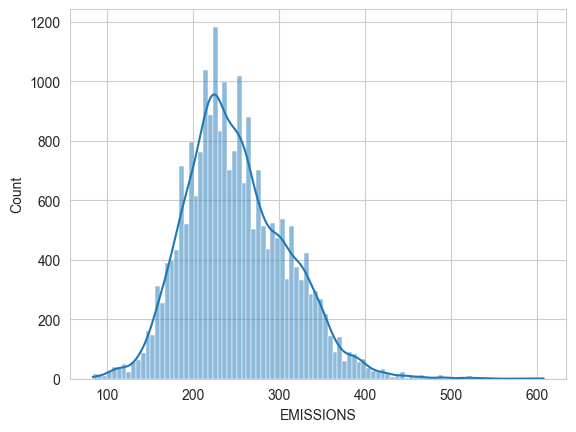

In [39]:
sns.histplot(data=end_df,x=end_df.EMISSIONS,kde=True)
# the histplot is showing there is right skew in the graph

#### Checking Skewness and kurtosis

In [40]:
end_df.skew() #skewness of each columns

MAKE                0.290168
MODEL               0.029758
VEHICLE CLASS       0.136590
ENGINE SIZE         0.631319
CYLINDERS           0.911443
TRANSMISSION        0.181361
FUEL               -1.709179
FUEL CONSUMPTION    0.760971
HWY (L/100 km)      0.936788
COMB (L/100 km)     0.817219
COMB (mpg)          1.172822
EMISSIONS           0.534733
dtype: float64

In [41]:
kurtosis(end_df,fisher=False) # here the  k is greater than 3 therefor it leptokurtic

array([1.83380496, 1.8087378 , 1.82548743, 2.60486441, 4.19838881,
       1.64336556, 6.99561546, 4.10466635, 4.14964167, 4.05476434,
       6.6428208 , 3.61559988])

### Checking outliers in each 12 features using Boxplot

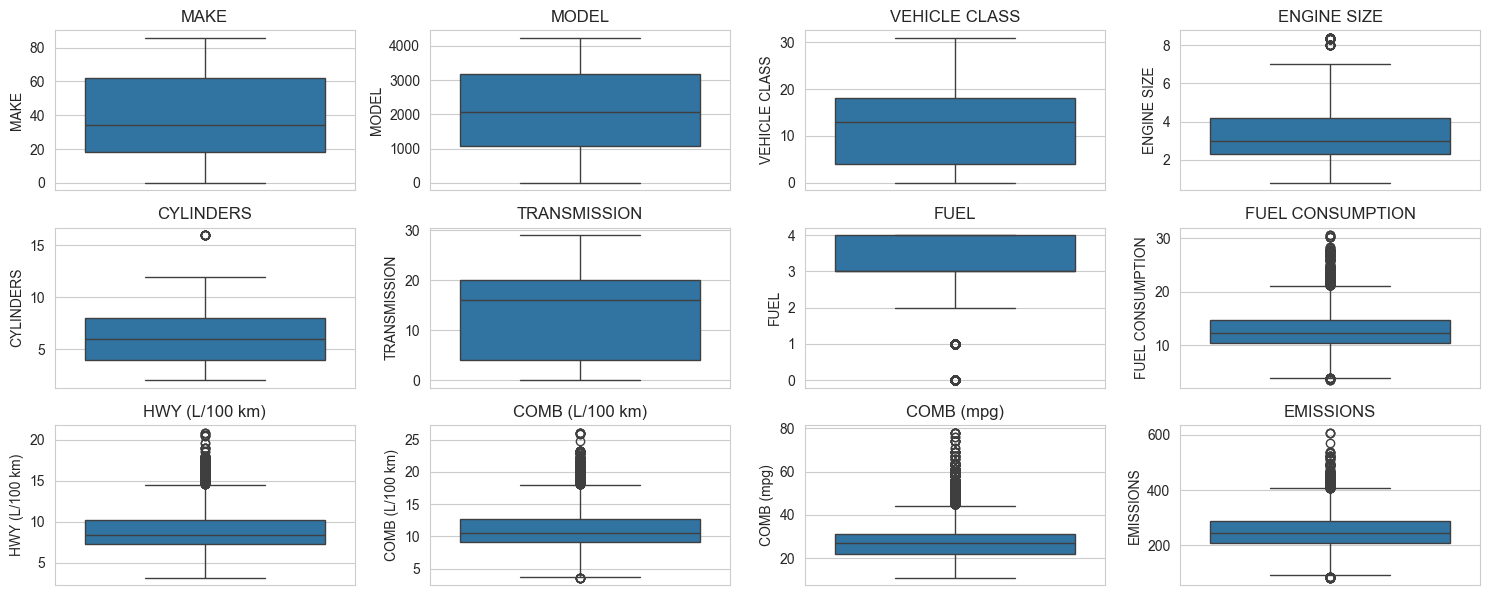

In [42]:
plt.figure(figsize=(15,10))
for i, col in enumerate(end_df.columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=end_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()
# there are outiers according to boxplot

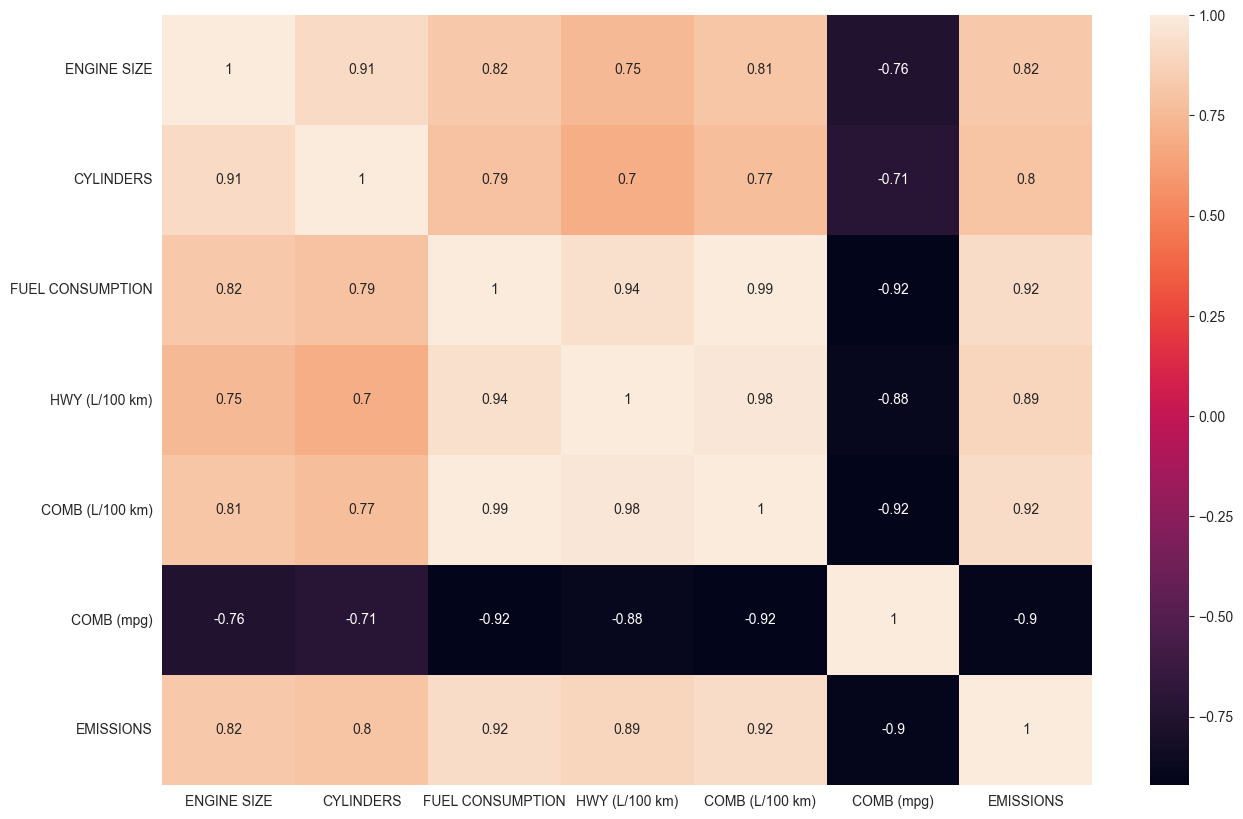

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(end_df.select_dtypes(include=['int64','float64']).corr(),annot=True)
plt.show()

## Remove outliers

#### Removing outliers useing IQR method

In [44]:
q1=end_df.quantile(0.25)
q3 = end_df.quantile(0.75)
iqr = q3-q1
lw=q1-1.5*iqr
uw=q3+1.5*iqr
outliers =((end_df <lw) | (end_df >uw)).any(axis=1)
no_out=end_df[~outliers]


In [45]:
no_out

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,0,1,0,1.6,4,2,3,9.2,6.7,8.1,35,186
1,0,1,0,1.6,4,27,3,8.5,6.5,7.6,37,175
2,0,61,4,3.2,6,15,4,12.2,7.4,10.0,28,230
3,0,62,4,3.5,6,2,4,13.4,9.2,11.5,25,264
4,0,2173,17,1.8,4,2,3,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...
22551,86,4061,21,2.0,4,18,4,10.7,7.7,9.4,30,219
22552,86,4067,21,2.0,4,18,4,10.5,8.1,9.4,30,219
22553,86,4068,21,2.0,4,18,4,11.0,8.7,9.9,29,232
22554,86,4088,22,2.0,4,18,4,11.5,8.4,10.1,28,236


#### 2092 outliers has been removed, Remaining is 20463 row and 12 columns

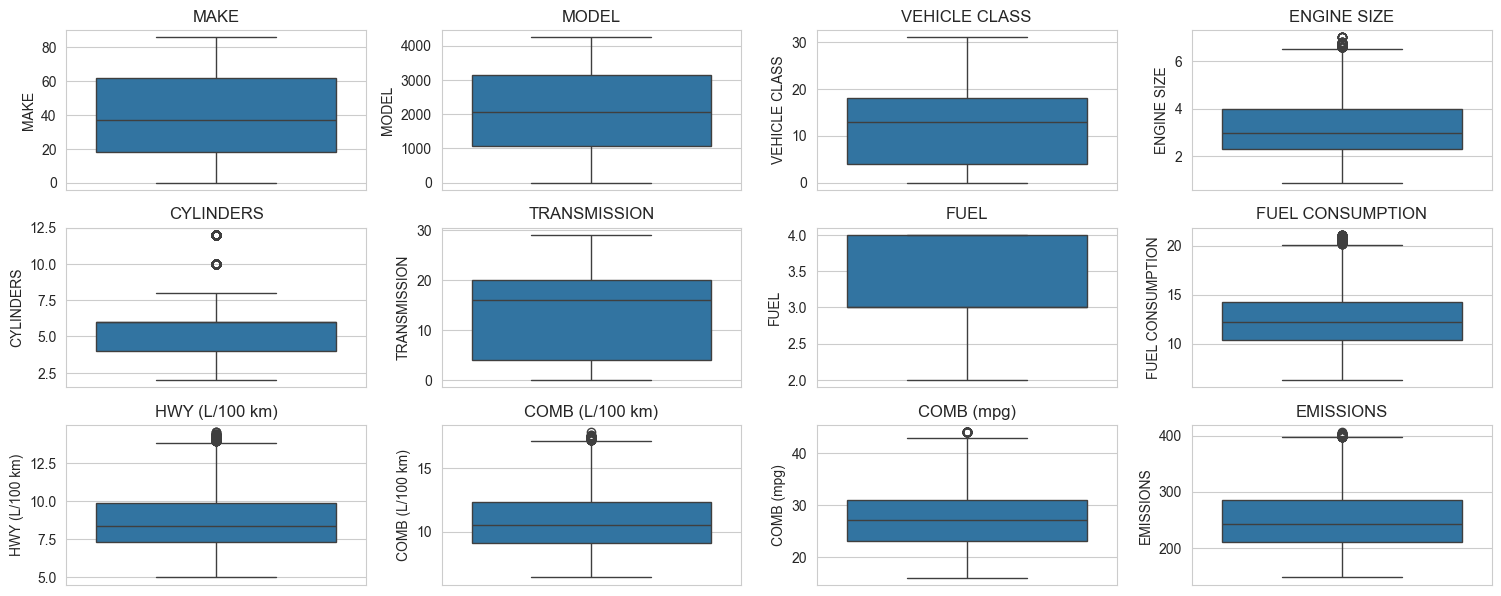

In [46]:
plt.figure(figsize=(15,10))
for i, col in enumerate(no_out.columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=no_out[col])
    plt.title(col)
plt.tight_layout()
plt.show()
# there are outiers but most of the outliers are removed 

#### Remaining outliers are replaced using below method

In [47]:
feat_col=no_out.columns.values
feat_col

array(['MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'], dtype=object)

In [48]:
def whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw 

In [49]:
for i in feat_col:
    lw,uw=whisker(no_out[i])
    no_out[i]=np.where(no_out[i]<lw,lw,no_out[i])
    no_out[i]=np.where(no_out[i]>uw,uw,no_out[i])
#Replaceing the outliers with lowers_whisker =lw and upper_whisker=uw

In [50]:
no_out.shape

(20463, 12)

## Visualization

#### Boxplot after outliers are removed

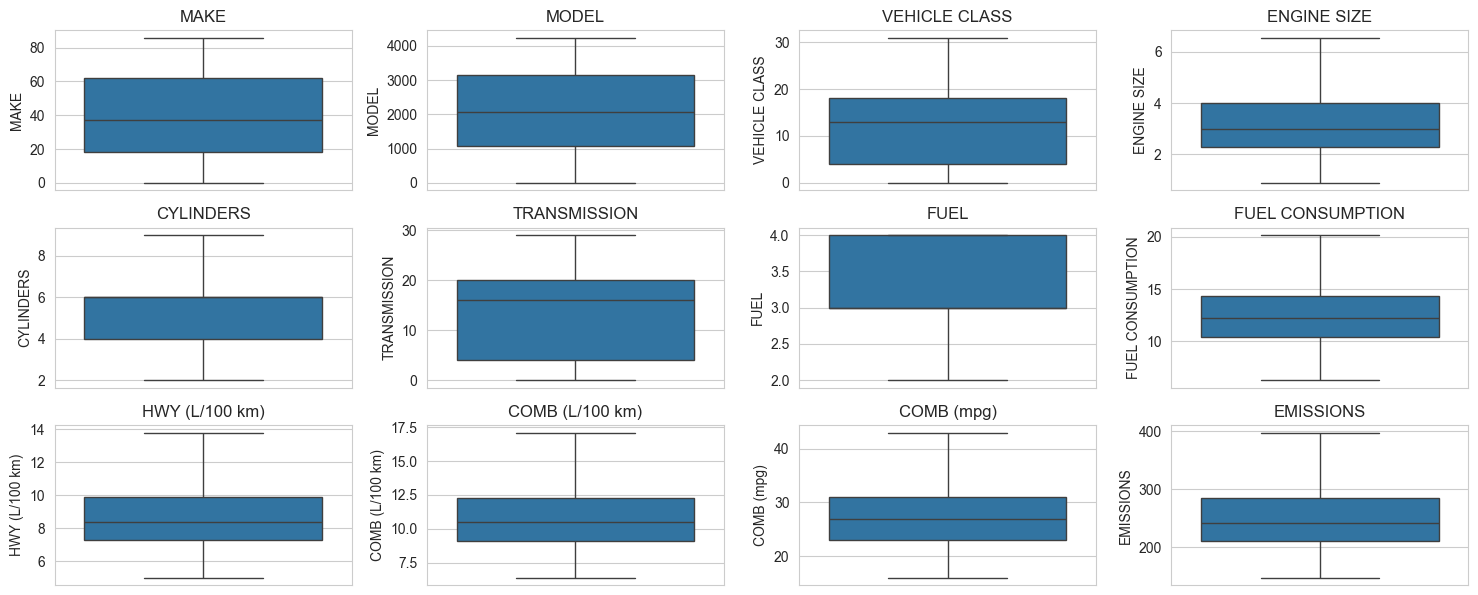

In [51]:
plt.figure(figsize=(15,10))
for i, col in enumerate(no_out.columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=no_out[col])
    plt.title(col)
plt.tight_layout()
plt.show()
#  the outliers are replaced by lower_whisker and upper_whisker

#### Histplot after outliers are removed

<Axes: xlabel='EMISSIONS', ylabel='Count'>

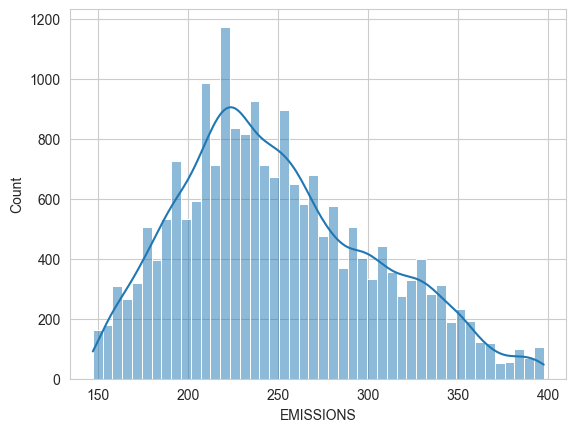

In [52]:
sns.histplot(data=no_out,x=no_out.EMISSIONS,kde=True)
# histplot after outliers are removed

In [53]:
kurtosis(no_out,fisher=False) # here the  k is lesser than 3 therefor it platykurtic

array([1.78648871, 1.79407045, 1.80150042, 2.5007442 , 1.87325854,
       1.63702368, 1.11439407, 2.71992987, 2.64578807, 2.63144859,
       2.69506404, 2.60809482])

In [54]:
no_out.skew()

MAKE                0.218948
MODEL               0.033236
VEHICLE CLASS       0.124060
ENGINE SIZE         0.620056
CYLINDERS           0.313853
TRANSMISSION        0.131987
FUEL                0.206357
FUEL CONSUMPTION    0.442614
HWY (L/100 km)      0.568487
COMB (L/100 km)     0.481630
COMB (mpg)          0.421431
EMISSIONS           0.472768
dtype: float64

#### scatterplot after outliers are removed

<Axes: xlabel='FUEL CONSUMPTION', ylabel='EMISSIONS'>

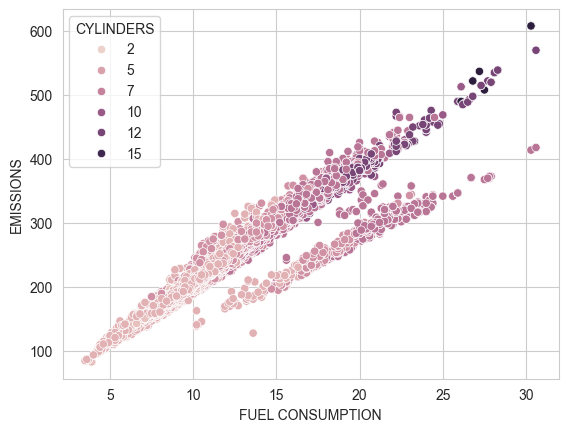

In [96]:
sns.scatterplot(data=end_df,x='FUEL CONSUMPTION',y='EMISSIONS',hue='CYLINDERS')
# there is a positive correlation between emission and fuel consumption

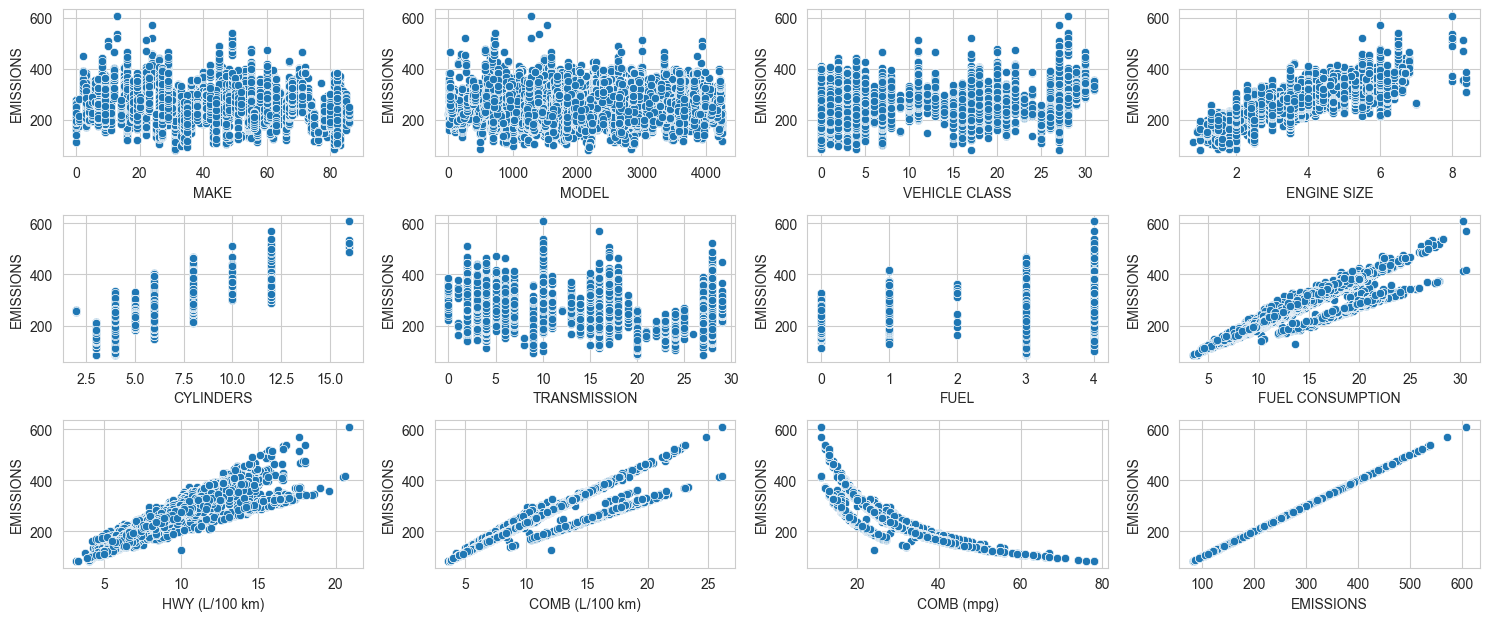

In [97]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(end_df.columns):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=end_df,x=col,y='EMISSIONS')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [55]:
no_out.nlargest(10,'EMISSIONS')

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
958,29.0,2271.0,18.0,6.00,8.0,2.0,3.0,20.15,13.8,17.1,16.0,397.5
960,29.0,2282.0,18.0,6.00,8.0,2.0,3.0,20.15,13.8,17.1,16.0,397.5
1050,48.0,2690.0,18.0,5.40,8.0,2.0,4.0,20.15,13.7,17.1,16.0,397.5
1355,8.0,680.0,17.0,6.55,8.0,2.0,4.0,20.15,13.6,17.1,16.0,397.5
1565,22.0,2997.0,30.0,5.20,8.0,2.0,3.0,19.80,13.8,17.1,16.0,397.5
1774,48.0,2691.0,18.0,5.40,8.0,2.0,4.0,20.15,13.7,17.1,16.0,397.5
1906,70.0,1125.0,17.0,6.55,8.0,2.0,4.0,20.15,13.6,17.1,16.0,397.5
2101,8.0,680.0,17.0,6.55,8.0,2.0,4.0,20.15,13.6,17.1,16.0,397.5
2548,53.0,1144.0,17.0,4.20,8.0,28.0,4.0,20.15,13.0,17.1,16.0,397.5
2550,53.0,3500.0,17.0,4.20,8.0,28.0,4.0,20.15,13.0,17.1,16.0,397.5


### feature Selection

In [56]:
no_out.corr()

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
MAKE,1.000000,0.060362,-0.056898,-0.220637,-0.249213,0.146126,-0.018114,-0.220525,-0.162304,-0.203606,0.203784,-0.202939
MODEL,0.060362,1.000000,0.163122,0.048280,0.039588,-0.058241,-0.148335,0.074097,0.134203,0.096694,-0.088082,0.097364
VEHICLE CLASS,-0.056898,0.163122,1.000000,0.113249,0.087560,-0.068098,-0.011696,0.206219,0.318659,0.249285,-0.244029,0.252781
ENGINE SIZE,-0.220637,0.048280,0.113249,1.000000,0.928265,-0.309284,0.096053,0.844787,0.753022,0.827473,-0.796205,0.822611
CYLINDERS,-0.249213,0.039588,0.087560,0.928265,1.000000,-0.294825,0.209643,0.829501,0.720155,0.805564,-0.781877,0.801411
TRANSMISSION,0.146126,-0.058241,-0.068098,-0.309284,-0.294825,1.000000,0.167799,-0.296949,-0.306044,-0.305099,0.309584,-0.300208
FUEL,-0.018114,-0.148335,-0.011696,0.096053,0.209643,0.167799,1.000000,0.149581,0.042294,0.114255,-0.145144,0.120583
FUEL CONSUMPTION,-0.220525,0.074097,0.206219,0.844787,0.829501,-0.296949,0.149581,1.000000,0.921661,0.990309,-0.961904,0.986627
HWY (L/100 km),-0.162304,0.134203,0.318659,0.753022,0.720155,-0.306044,0.042294,0.921661,1.000000,0.965983,-0.928399,0.967743
COMB (L/100 km),-0.203606,0.096694,0.249285,0.827473,0.805564,-0.305099,0.114255,0.990309,0.965983,1.000000,-0.967298,0.998116


<Axes: >

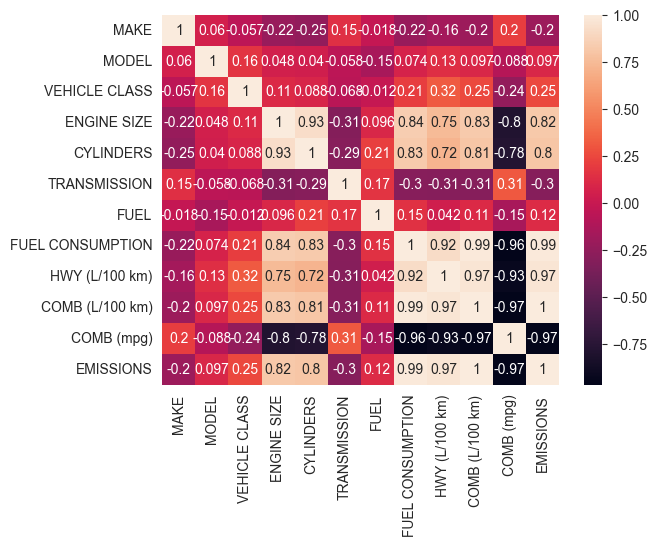

In [57]:
sns.heatmap(no_out.corr(),annot=True)

In [58]:
corr1=no_out.corrwith(no_out['EMISSIONS'])

<Axes: >

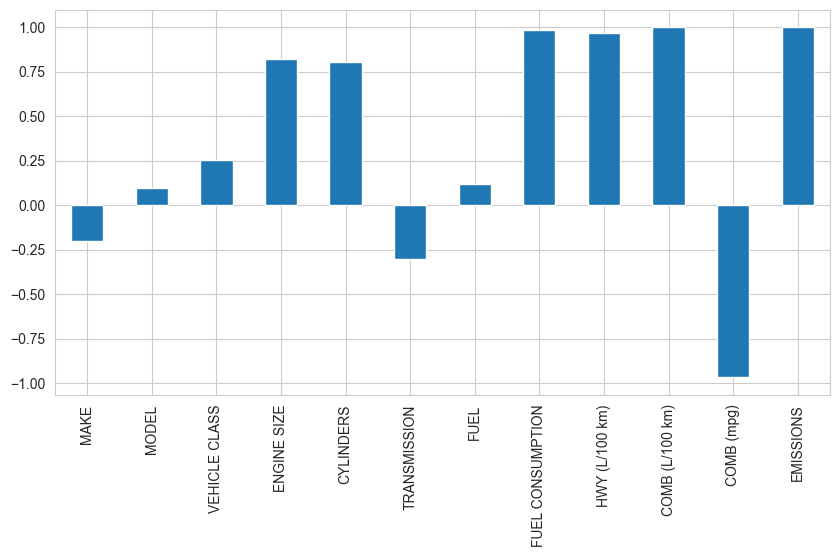

In [59]:
plt.figure(figsize=(10,5))
corr1.plot(kind='bar')

##### from the above graph we can see that features like MAKE,MODEL,VEHICLE CLASS,TRANSMISSION,FUEL, all are neg corr with EMISSION

### feature selection using SelectKBest Algorithm

In [60]:
x = no_out.drop(['EMISSIONS'], axis=1)
y = no_out['EMISSIONS']


### 

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Select the top 6 features with the highest F-value
selector = SelectKBest(f_regression, k=6)
selector.fit(x, y)

# Get the selected features
selected_features = x.columns[selector.get_support()]

# Create a new DataFrame with the selected features
X_selected = x[selected_features]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)'],
      dtype='object')


In [62]:
X_selected # selected best features

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg)
0,1.6,4.0,9.2,6.7,8.1,35.0
1,1.6,4.0,8.5,6.5,7.6,37.0
2,3.2,6.0,12.2,7.4,10.0,28.0
3,3.5,6.0,13.4,9.2,11.5,25.0
4,1.8,4.0,10.0,7.0,8.6,33.0
...,...,...,...,...,...,...
22551,2.0,4.0,10.7,7.7,9.4,30.0
22552,2.0,4.0,10.5,8.1,9.4,30.0
22553,2.0,4.0,11.0,8.7,9.9,29.0
22554,2.0,4.0,11.5,8.4,10.1,28.0


## Data Splitting

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

##  Decision Tree Regressor

In [64]:

dt = DecisionTreeRegressor().fit(X_train, y_train)

In [65]:
xtrain=dt.predict(X_train)
xtrain


array([247.        , 301.        , 334.        , ..., 191.72727273,
       336.        , 198.        ])

In [66]:
mse_train=mean_squared_error(y_train,xtrain)
mse_train

1.1195399610490882

In [67]:
xtest=dt.predict(X_test)
xtest

array([214., 202., 232., ..., 246., 218., 224.])

In [68]:
mse_test=mean_squared_error(y_test,xtest)
mse_test

7.887253594204643

In [69]:
xtrain=dt.predict(X_train)
dt_pred = dt.predict(X_test)
print('Decision Tree Regression:')
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, dt_pred))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, dt_pred))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, dt_pred))

Decision Tree Regression:
MSE_train 1.1195399610490882
MSE_test: 7.887253594204643
MAE_train 0.3175278137962747
MAE: 0.8480223186428905
R-squared_train 0.9996162873454706
R-squared: 0.9972638101054196


## Linear Regression

In [70]:

lr = LinearRegression()
lr.fit(X_train, y_train)
xtrain=lr.predict(X_train)
lr_pred = lr.predict(X_test)
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, lr_pred))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, lr_pred))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, lr_pred))

MSE_train 9.967433080359422
MSE_test: 11.607280904445028
MAE_train 1.8628711905996092
MAE: 1.9118916493433091
R-squared_train 0.996583748379535
R-squared: 0.9959732847010734


## Random Forest

In [71]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
xtrain=rf.predict(X_train)
print('Random Forest Regression:')
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, rf_pred))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, rf_pred))

Random Forest Regression:
MSE_train 1.613621614096385
MSE_test: 6.327895425595908
MAE_train 0.5140241349493757
MAE: 0.9520055145893854
R-squared_train 0.9994469451252362
R-squared: 0.997804771545548


## GradienBoost

In [72]:

gbr=GradientBoostingRegressor().fit(X_train, y_train)
y_pred=gbr.predict(X_test)
xtrain=gbr.predict(X_train)
print('GradienBoost Regression')
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, y_pred))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, y_pred))

GradienBoost Regression
MSE_train 7.062830944013548
MSE_test: 10.322023311315402
MAE_train 1.657348888382656
MAE: 1.7352088110716086
R-squared_train 0.9975792756808068
R-squared: 0.9964191571199389


## Support vector regression

In [73]:

svr_model=SVR(kernel='rbf',C=3)
svr_model.fit(X_train, y_train)

SVR(C=3)

In [74]:

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
xtrain=svr.predict(X_train)
svr_pred = svr.predict(X_test)
print('Support Vector Regression:')
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, svr_pred))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, svr_pred))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, svr_pred))

Support Vector Regression:
MSE_train 11.371912442225778
MSE_test: 13.182635060158397
MAE_train 1.671627367154348
MAE: 1.7509334747029284
R-squared_train 0.9961023752057999
R-squared: 0.9954267740469193


In [75]:
# Define the 5 regression models
models = [SVR(kernel='linear'),GradientBoostingRegressor(),LinearRegression(), RandomForestRegressor(),  DecisionTreeRegressor()]

# Create a dictionary to store the values
models_values = {}

# Fit each model and store the values
for model in models:
	model.fit(X_train, y_train)
	y_pred_train = model.predict(X_train)
	y_pred_test = model.predict(X_test)
	models_values[type(model).__name__] = [mean_squared_error(y_train, y_pred_train), 
                                           mean_squared_error(y_test, y_pred_test), 
    									   mean_absolute_error(y_train, y_pred_train), 
    									   mean_absolute_error(y_test, y_pred_test), 
    									   r2_score(y_train, y_pred_train), 
    									   r2_score(y_test, y_pred_test)]

# Create a DataFrame from the dictionary
df = pd.DataFrame(models_values).T

# Rename the columns
df.columns = ['MSE_train','MSE_test','MAE_train','MAE_test','R-squared_train','R-squared_test']
print(df)

	

                           MSE_train   MSE_test  MAE_train  MAE_test  \
SVR                        11.371912  13.182635   1.671627  1.750933   
GradientBoostingRegressor   7.062831  10.322023   1.657349  1.735209   
LinearRegression            9.967433  11.607281   1.862871  1.911892   
RandomForestRegressor       1.618481   6.394767   0.513293  0.957274   
DecisionTreeRegressor       1.119540   7.947351   0.317528  0.855128   

                           R-squared_train  R-squared_test  
SVR                               0.996102        0.995427  
GradientBoostingRegressor         0.997579        0.996419  
LinearRegression                  0.996584        0.995973  
RandomForestRegressor             0.999445        0.997782  
DecisionTreeRegressor             0.999616        0.997243  


#### To get more accuracy for models Hyperparameter Tunning is done for models ,so we get the best fit parameters for every model

# Hyperparameter Tunning  

### Decision Tree Tunning

In [83]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None,'sqrt', 'log2'],
     'max_leaf_nodes': [None, 10, 20, 30]
}

# Define the Decision Tree model
dt1 = DecisionTreeRegressor()

# Perform GridSearchCV
grid_search = GridSearchCV(dt1, param_grid)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: 0.997283027246611


In [84]:

dt2 = DecisionTreeRegressor(max_depth= 15, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5,max_leaf_nodes= None,random_state=42)
dt2.fit(X_train, y_train)
dt_pred = dt2.predict(X_test)
print('DecisionTreeRegressor:')
print('MSE_test:', mean_squared_error(y_test, dt_pred))
print('MAE:', mean_absolute_error(y_test, dt_pred))
print('R-squared:', r2_score(y_test, dt_pred))

DecisionTreeRegressor:
MSE_test: 8.63720154309229
MAE: 1.0862103950105033
R-squared: 0.9970036434993002


#### In case of hyperparameters tunning for Decision tree, it has nothing much of a change in the accuracy

### RandomForest Tunning

In [76]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt','log2']
}


In [77]:

# Define the Random Forest model
rf1 = RandomForestRegressor()

In [78]:
# Perform GridSearchCV
grid_search = GridSearchCV(rf1,param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [79]:

# Print the best hyperparameters and the corresponding score
print("Best parameters:",grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best score: 0.9980349104565802


In [81]:

rf2 = RandomForestRegressor(max_depth= 15, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators=150 ,random_state=42)
rf2.fit(X_train, y_train)
rf_pred = rf2.predict(X_test)
print('Random Forest Regression:')
print('MSE_test:', mean_squared_error(y_test, rf_pred))
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('R-squared:', r2_score(y_test, rf_pred))

Random Forest Regression:
MSE_test: 6.294261012514002
MAE: 1.0286208458986017
R-squared: 0.9978164397568063


### The accuracy of r_square has slightly increased

# Model Observation

### RandomForest Regressor model has the highest accuracy of 0.998%
###  Decision tree Regressor model has the  accuracy of 0.99700%

# Conclustion

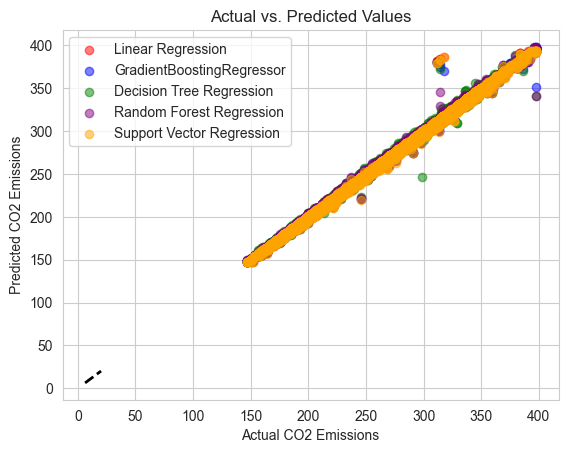

In [116]:
plt.scatter(y_test, lr_pred, color='red', alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='GradientBoostingRegressor')
plt.scatter(y_test, dt_pred, color='green', alpha=0.5, label='Decision Tree Regression')
plt.scatter(y_test, rf_pred, color='purple', alpha=0.5, label='Random Forest Regression')
plt.scatter(y_test, svr_pred, color='orange', alpha=0.5, label='Support Vector Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

#### Support Vector Regression and Gradient Boosting Regressor provide the most accurate predictions for CO2 emissions, as indicated by their close alignment with the ideal prediction line. Random Forest Regression also performs well but to a slightly lesser extent. These models are preferable for this dataset, with Support Vector Regression showing the best overall performance.